In [10]:
from kkexpr.expr_functions import *
import pandas as pd

In [11]:
alpha1 = '((ts_rank(volume, 32) * (1 - ts_rank(((close + high) - low), 16))) * (1 - ts_rank(returns, 32)))'

In [12]:
from kkexpr.config import DATA_DIR
from kkexpr.expr import calc_expr

In [13]:
df_all = pd.read_csv(DATA_DIR.joinpath('quotes').joinpath('{}.csv'.format('159915.SZ')).resolve())

In [14]:
df_all.set_index(['date', 'symbol'], inplace=True)
df_all.dropna(inplace=True)
df_all.sort_index(level=0, inplace=True)
df_all['returns'] = calc_expr(df_all, 'close/delay(close,1)-1')

In [15]:
df_all.dropna(inplace=True)

In [16]:
df_all['returns']

date      symbol   
20111212  159915.SZ   -0.008783
20111213  159915.SZ   -0.027848
20111214  159915.SZ   -0.010417
20111215  159915.SZ   -0.010526
20111216  159915.SZ    0.038564
                         ...   
20240522  159915.SZ   -0.004376
20240523  159915.SZ   -0.004945
20240524  159915.SZ   -0.016565
20240527  159915.SZ   -0.006176
20240528  159915.SZ    0.007910
Name: returns, Length: 3024, dtype: float64

In [17]:
df_all["alpha1"] = calc_expr(df_all, alpha1)

<Axes: xlabel='date,symbol'>

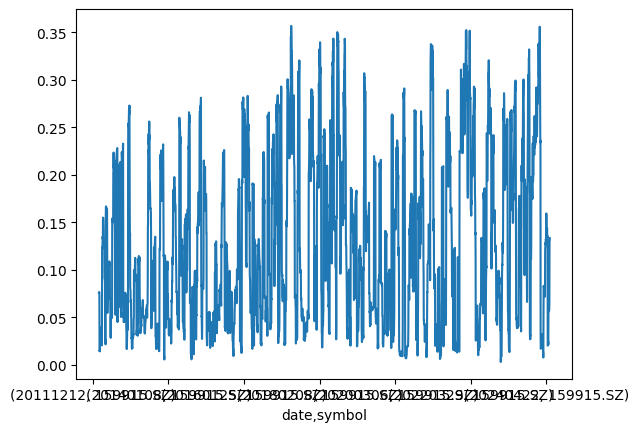

In [18]:
df_all["alpha1"].rolling(10).std().plot()